In [43]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict,Annotated
import os
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.checkpoint.memory import MemorySaver

In [37]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages :  Annotated[list[BaseMessage], add_messages] # here base message is ntg but as we have system message, human message,ai message, tool message inorder to support all of these messages thhen we have to use base message and also after that we are using reducer function which helps us to add the data to the list if we did not use that reducer function then values will be replaced by one other so we use a built in lang graph function as reducer function here




In [38]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model = os.getenv('GEMINI_MODEL'), api_key = os.getenv('Google_API_KEY'))

def chat_node(state : ChatState):
    
    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # output store to state

    return {'messages': [response]}

In [49]:
checkpointer = MemorySaver() # checkpoint is the object of memory saver class
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node',chat_node)

# add edges
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

# compile
chatbot = graph.compile(checkpointer = checkpointer)

#execute
intial_state = {
    'messages': [HumanMessage(content = 'What is the capital of India')]
    
} 

# chatbot.invoke(intial_state)

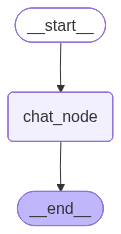

In [40]:
chatbot

In [41]:
chatbot.invoke(intial_state)['messages'][-1].content

'The capital of India is **New Delhi**.'

In [45]:
thread_id ='1'

while True:
    user_message = input('Type here: ')
    print('user_message', user_message)
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    config = {'configurable':{'thread_id' : thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]},config = config)

    print('AI:',response['messages'][-1].content)


user_message hi my name is gayathri
AI: Hi Gayathri! It's nice to meet you. How can I help you today?
user_message what is my name
AI: Your name is Gayathri.
user_message what is lpu
AI: LPU stands for **Lovely Professional University**.

It's a private university located in Phagwara, Punjab, India. It's known for offering a wide range of programs across various disciplines, including engineering, management, law, agriculture, and design.

Do you want to know more about LPU, such as its programs, rankings, or admission process?
user_message who is Vice chancellor of lpu
AI: The Vice-Chancellor of Lovely Professional University (LPU) is **Dr. Preeti Bajaj**.
user_message can you add 1 and 2
AI: 1 + 2 = 3
user_message can you add 5 to the result
AI: Okay, adding 5 to the previous result of 3:

3 + 5 = 8
user_message exit


In [48]:
chatbot.get_state(config = config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is gayathri', additional_kwargs={}, response_metadata={}, id='21d465d2-2e89-4c91-80e8-9261196e00a6'), AIMessage(content="Hi Gayathri! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--c4a61999-0f22-4b8f-8ef4-a4fd9fdf2bc9-0', usage_metadata={'input_tokens': 7, 'output_tokens': 21, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='f2ff2e7e-83f1-4920-a7f5-4f44592cbaf7'), AIMessage(content='Your name is Gayathri.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [],